In [1]:
import pandas as pd
import numpy as np
from prompt_toolkit.input import Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.layers import Dense,Dropout, Conv1D, Flatten, MaxPooling1D, LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from keras import Input

In [77]:
df = pd.read_csv('datasets/BTC-Daily.csv')

In [78]:
df.drop(columns='symbol', inplace=True)

In [79]:
df['date'] = pd.to_datetime(df['date'])
df.set_index(keys='date', inplace=True)
df.sort_index(inplace=True)

In [8]:
df.isnull().sum()

open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

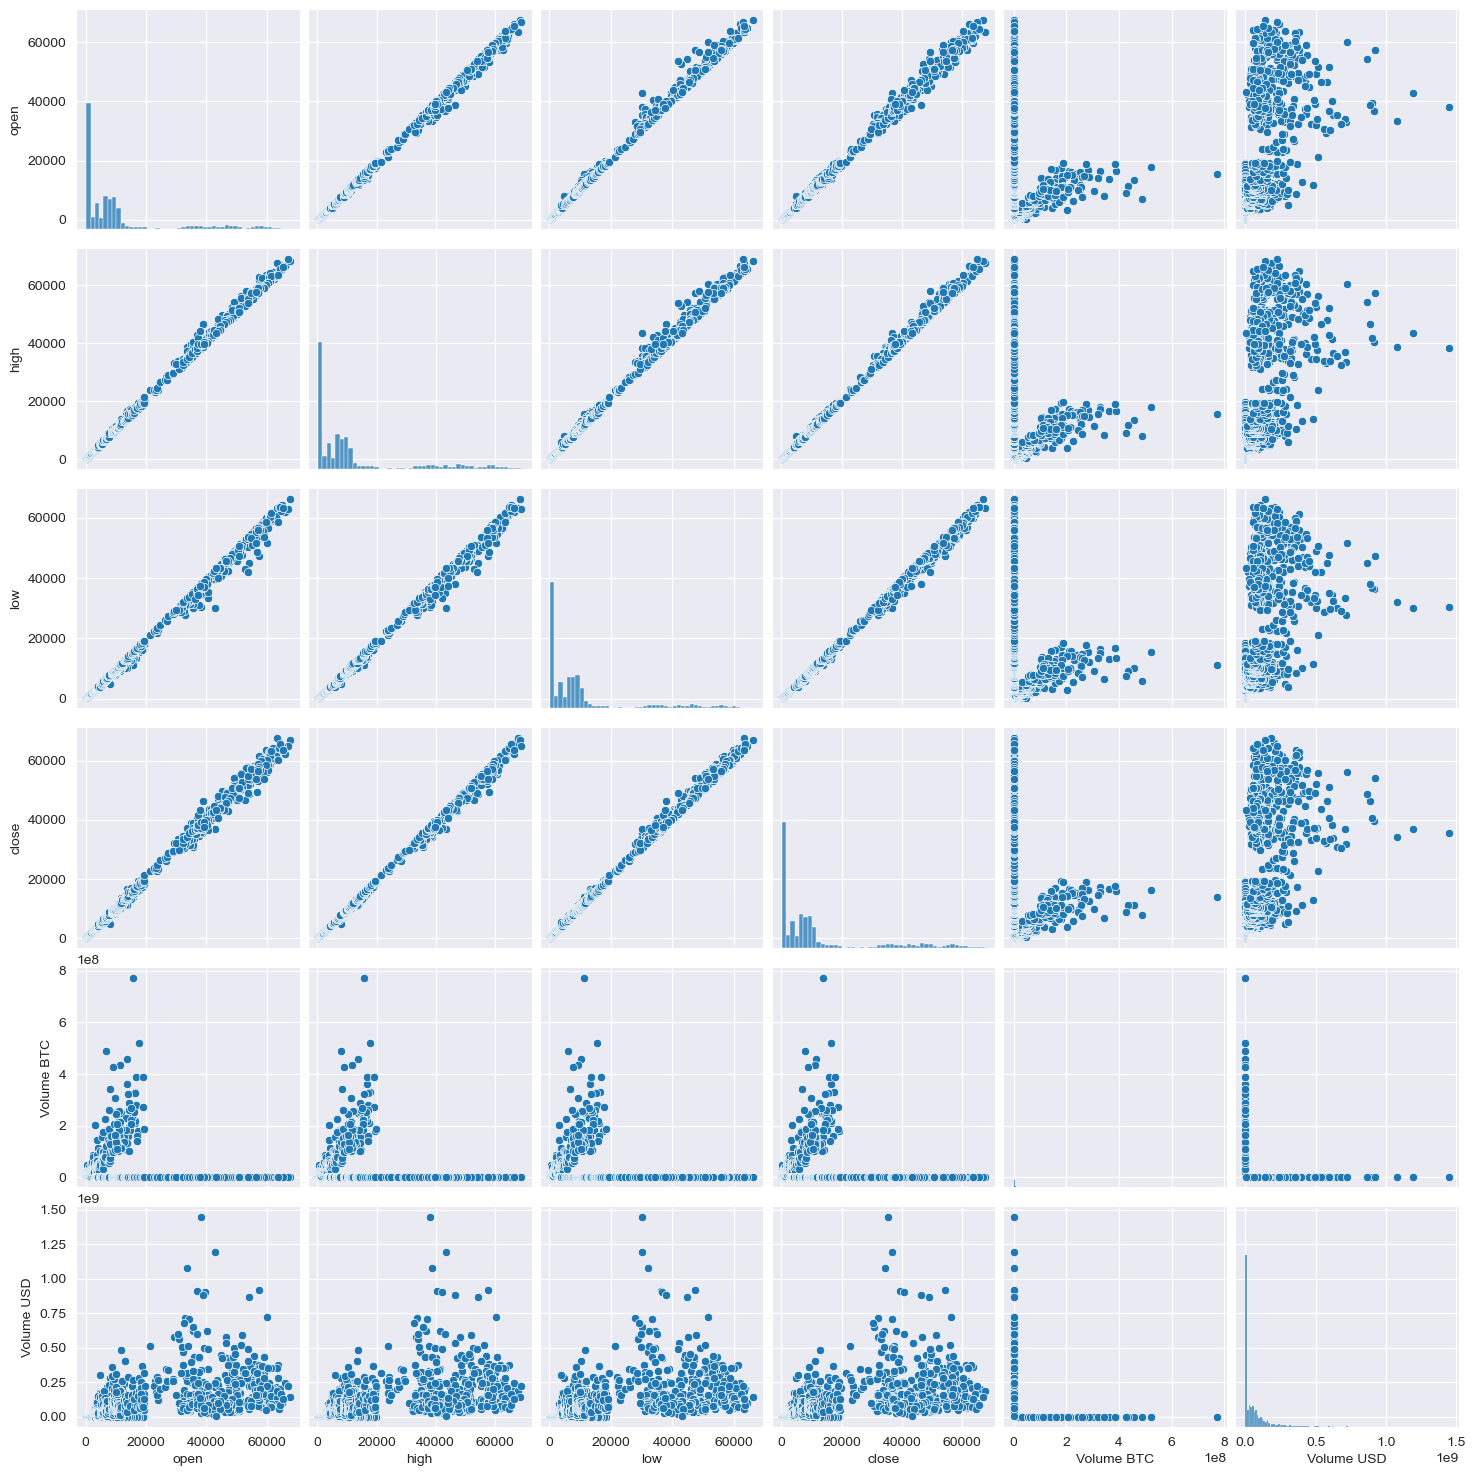

In [9]:
sns.pairplot(df)
plt.show()

<Axes: >

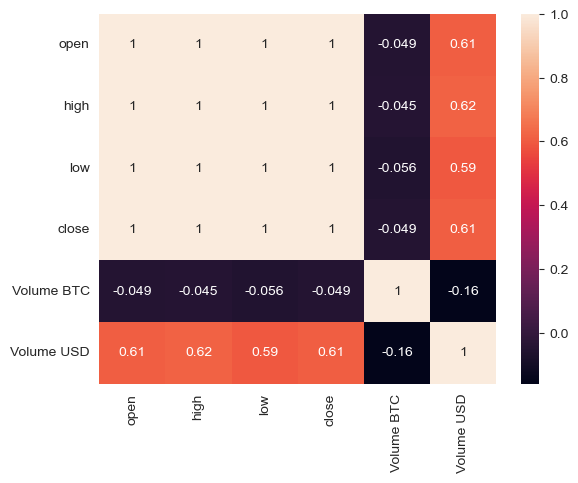

In [10]:
sns.heatmap(df.corr(), annot=True)

In [80]:
# 1 nacin - samo close kolonata ke ja zemam

for lag in range(7,0,-1):
    df[f'close_lag{lag}'] = df['close'].shift(lag)

In [44]:
df

,open,high,low,close,Volume BTC,Volume USD,close_lag7,close_lag6,close_lag5,close_lag4,close_lag3,close_lag2,close_lag1
date,,,,,,,,,,,,,
2014-11-28,363.59,381.34,360.57,376.28,3.220878e+06,8.617150e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03,NaN,NaN,NaN,NaN,NaN,NaN,376.28
2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03,NaN,NaN,NaN,NaN,NaN,376.28,376.72
2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03,NaN,NaN,NaN,NaN,376.28,376.72,373.34
2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03,NaN,NaN,NaN,376.28,376.72,373.34,378.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-25,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07,39996.99,40109.02,38373.90,37076.60,38269.94,37274.18,38376.88
2022-02-26,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07,40109.02,38373.90,37076.60,38269.94,37274.18,38376.88,39231.64
2022-02-27,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07,38373.90,37076.60,38269.94,37274.18,38376.88,39231.64,39146.66


In [81]:
df.drop(columns=['open', 'high', 'low', 'Volume BTC', 'Volume USD'], inplace=True)

In [82]:
df.dropna(axis=0, inplace=True)

In [47]:
df

,close,close_lag7,close_lag6,close_lag5,close_lag4,close_lag3,close_lag2,close_lag1
date,,,,,,,,
2014-12-05,374.95,376.28,376.72,373.34,378.39,379.25,376.67,365.20
2014-12-06,375.07,376.72,373.34,378.39,379.25,376.67,365.20,374.95
2014-12-07,376.87,373.34,378.39,379.25,376.67,365.20,374.95,375.07
2014-12-08,364.61,378.39,379.25,376.67,365.20,374.95,375.07,376.87
2014-12-09,350.49,379.25,376.67,365.20,374.95,375.07,376.87,364.61
...,...,...,...,...,...,...,...,...
2022-02-25,39231.64,39996.99,40109.02,38373.90,37076.60,38269.94,37274.18,38376.88
2022-02-26,39146.66,40109.02,38373.90,37076.60,38269.94,37274.18,38376.88,39231.64
2022-02-27,37712.68,38373.90,37076.60,38269.94,37274.18,38376.88,39231.64,39146.66


In [83]:
x = df.drop(columns = 'close')
y = df['close']

In [84]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, shuffle=False)

In [86]:
x_train.shape

(2115, 7)

In [87]:
lags = 7

In [88]:
# (samples, features, lags)
x_train_shaped = x_train.reshape((x_train.shape[0], (x_train.shape[1] // 7), lags))
x_test_shaped = x_test.reshape((x_test.shape[0], (x_test.shape[1] // 7), lags))

In [89]:
x_train_shaped.shape

(2115, 1, 7)

# Neural Network 

In [92]:
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape = (x_train_shaped.shape[1], x_train_shaped.shape[2])),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

In [93]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [94]:
history = model.fit(x_train_shaped, y_train, batch_size=16, epochs = 8, validation_split = 0.1)

Epoch 1/8
119/119 [==============================] - 1s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 7.1039e-05 - val_mean_squared_error: 7.1039e-05
Epoch 2/8
119/119 [==============================] - 0s 2ms/step - loss: 1.5498e-04 - mean_squared_error: 1.5498e-04 - val_loss: 6.6358e-05 - val_mean_squared_error: 6.6358e-05
Epoch 3/8
119/119 [==============================] - 0s 2ms/step - loss: 1.4411e-04 - mean_squared_error: 1.4411e-04 - val_loss: 8.4944e-05 - val_mean_squared_error: 8.4944e-05
Epoch 4/8
119/119 [==============================] - 0s 2ms/step - loss: 1.4134e-04 - mean_squared_error: 1.4134e-04 - val_loss: 1.1811e-04 - val_mean_squared_error: 1.1811e-04
Epoch 5/8
119/119 [==============================] - 0s 2ms/step - loss: 1.3296e-04 - mean_squared_error: 1.3296e-04 - val_loss: 9.2568e-05 - val_mean_squared_error: 9.2568e-05
Epoch 6/8
119/119 [==============================] - 0s 2ms/step - loss: 1.1745e-04 - mean_squared_error: 1.1745e-04 - val_

<Axes: >

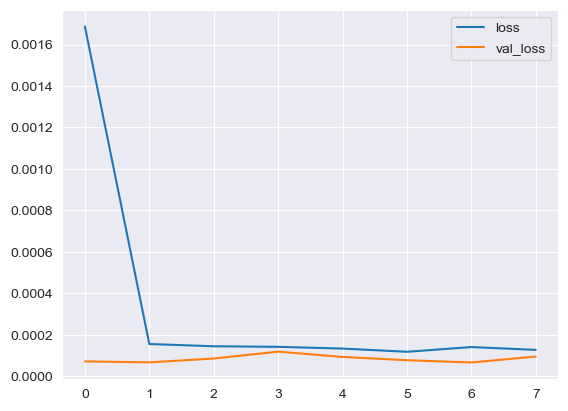

In [95]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [96]:
y_pred = model.predict(x_test_shaped)

17/17 [==============================] - 0s 734us/step


In [65]:
#y_pred = scaler_y.inverse_transform(y_pred)

In [97]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Root Mean Squared Error: 0.08108030302670345
Mean Absolute Error: 0.05938793714326634
R2 Score: 0.8650219265145142
